# Create Benchmark and Exponential Smoothing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.tsa.arima.model import ARIMA
%load_ext autoreload 
%autoreload 2
import functions as fun
#from sklearn.metrics import negative_log_likelyhood

c:\Users\ABajrami\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
c:\Users\ABajrami\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


,epoch_utc,emission_factor,datetime_de,windon_forecast,windoff_forecast,solar_forecast,prices_forecast,aggregated_generation_forecast,AT_import,AT_export,...,DK_import,DK_export,LU_import,LU_export,NL_import,NL_export,PL_import,PL_export,CH_import,CH_export
0,1.546297e+09,298.240217,2018-12-31 23:00:00+00:00,18879.75,5069.00,0.0,28.32,57054.0,61.0,4940.0,...,901.0,0.0,12.0,418.0,0.0,1354.0,224.0,0.0,0.0,800.0
1,1.546301e+09,266.522473,2019-01-01 00:00:00+00:00,20626.50,5042.25,0.0,10.07,57400.0,60.0,5073.0,...,316.0,0.0,16.0,398.0,0.0,1158.0,0.0,0.0,1.0,801.0
2,1.546304e+09,262.594215,2019-01-01 01:00:00+00:00,22355.50,5028.50,0.0,-4.08,57275.0,20.0,4284.0,...,0.0,405.0,19.0,379.0,0.0,1176.0,0.0,0.0,0.0,800.0
3,1.546308e+09,260.190772,2019-01-01 02:00:00+00:00,24032.50,4977.75,0.0,-9.91,58024.0,3.0,4273.0,...,0.0,619.0,23.0,373.0,0.0,1428.0,0.0,0.0,0.0,800.0
4,1.546312e+09,250.496683,2019-01-01 03:00:00+00:00,25452.00,4907.25,0.0,-7.41,59301.0,0.0,4961.0,...,0.0,689.0,27.0,370.0,0.0,1492.0,0.0,0.0,0.0,800.0


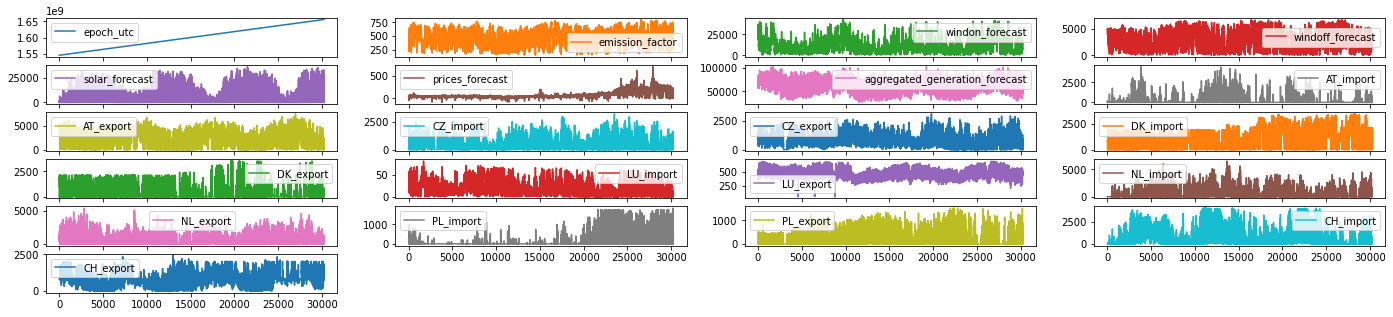

In [8]:
# 
dataset = pd.read_csv('training_data.csv')
dataset = dataset.drop(['Unnamed: 0'], axis = 1)
dataset.plot(subplots=True, layout=(14, 4), figsize=(24, 12))
dataset.head()

In [11]:
date =pd.to_datetime(features.datetime_de)

In [10]:
co2 = dataset['emission_factor']
cols_features = [c for c in dataset.columns if c != 'emission_factor']
cols = {c: i for i, c in enumerate(dataset.columns)}
indices = {ind: i for i, ind in enumerate(dataset.index)}
features = dataset.loc[:, [j for j in cols if j != 'emission_factor' and j in cols_features]]

In [12]:
co2.head()
#plt.plot(co2)

0    298.240217
1    266.522473
2    262.594215
3    260.190772
4    250.496683
Name: emission_factor, dtype: float64

In [13]:
features.head()

,epoch_utc,datetime_de,windon_forecast,windoff_forecast,solar_forecast,prices_forecast,aggregated_generation_forecast,AT_import,AT_export,CZ_import,...,DK_import,DK_export,LU_import,LU_export,NL_import,NL_export,PL_import,PL_export,CH_import,CH_export
0,1.546297e+09,2018-12-31 23:00:00+00:00,18879.75,5069.00,0.0,28.32,57054.0,61.0,4940.0,1076.0,...,901.0,0.0,12.0,418.0,0.0,1354.0,224.0,0.0,0.0,800.0
1,1.546301e+09,2019-01-01 00:00:00+00:00,20626.50,5042.25,0.0,10.07,57400.0,60.0,5073.0,514.0,...,316.0,0.0,16.0,398.0,0.0,1158.0,0.0,0.0,1.0,801.0
2,1.546304e+09,2019-01-01 01:00:00+00:00,22355.50,5028.50,0.0,-4.08,57275.0,20.0,4284.0,0.0,...,0.0,405.0,19.0,379.0,0.0,1176.0,0.0,0.0,0.0,800.0
3,1.546308e+09,2019-01-01 02:00:00+00:00,24032.50,4977.75,0.0,-9.91,58024.0,3.0,4273.0,111.0,...,0.0,619.0,23.0,373.0,0.0,1428.0,0.0,0.0,0.0,800.0
4,1.546312e+09,2019-01-01 03:00:00+00:00,25452.00,4907.25,0.0,-7.41,59301.0,0.0,4961.0,0.0,...,0.0,689.0,27.0,370.0,0.0,1492.0,0.0,0.0,0.0,800.0


#### inspect co2 data and make train, test, val split

In [14]:
co2.describe() 

count    30239.000000
mean       464.354124
std        141.599300
min        150.882862
25%        357.954288
50%        474.091124
75%        575.249999
max        797.968947
Name: emission_factor, dtype: float64

In [15]:
train_ratio = 0.7
val_ratio = 0.9
#test_ratio = 0.1

n = len(co2)
assert(n == len(features))
co2_train = co2[0:int(n*train_ratio)]
co2_long_train = co2[0:int(n*val_ratio)]
co2_val = co2[int(n*train_ratio):int(n*val_ratio)]
co2_test = co2[int(n*val_ratio):]
co2_test_plot = co2_test.copy()
co2_test_plot.index = co2[:len(co2_test)].index
assert(len(co2_train) == int(train_ratio*len(features)))

## statsistcal case
co2_stat = co2[0:len(co2)-24]
co2_stat_test = co2[len(co2)-24:]


In [16]:
assert(len(co2_stat_test) == 24)

In [17]:
co2_train.describe()

count    21167.000000
mean       449.590643
std        140.317600
min        150.882862
25%        339.426273
50%        457.547373
75%        560.837909
max        782.462741
Name: emission_factor, dtype: float64

#### create simple average model

In [12]:
simple_average_co2 = fun.simple_average(co2_long_train)
print(simple_average_co2)

In [13]:
co2_test_simple_average = fun.pred_avg(co2_test, simple_average_co2)
assert (len(co2_test_simple_average) == len(co2_test))

In [14]:
rep_test_simple_avg = fun.evaluation(co2_test,co2_test_simple_average, method = 'simple_average')
print(rep_test_simple_avg)

In [15]:
co2_test_simple_average_df = pd.DataFrame(co2_test_simple_average)
co2_test_simple_average_df.index = co2_test.index
co2_test_simple_average_df.head()

In [18]:
fun.plot_model(co2_test, co2_test_simple_average_df, 0, 500, 'simple average')

### create naive model

In [17]:
naive_co2 = fun.naive(co2_long_train)
#testing
co2_test_naive = fun.naive_forecast(co2_test, co2_long_train)
assert(len(co2_test_naive) == len(co2_test))

In [ ]:
rep_naive_test = fun.evaluation(co2_test, co2_test_naive, method = 'naive')
print(rep_naive_test)

In [ ]:
co2_test_naive_df = pd.DataFrame(co2_test_naive)
co2_test_naive_df.index = co2_test.index
co2_test_naive_df.head()

In [ ]:
fun.plot_model(co2_test, co2_test_naive_df,0, 500, 'naive latest value')

### Naive 2

In [19]:
co2_naive_2_test = fun.naive_forecast_2(co2_long_train, co2_test)
co2_naive_2_test.index = co2_test.index

In [20]:
rep_naive_test = fun.evaluation(co2_test, co2_naive_2_test, method = 'naive_2')
print(rep_naive_test)

In [28]:
fun.plot_model(co2_test,co2_naive_2_test,0, 500, 'naive last day')

### Simple moving average

In [29]:
forecast_period = 24
sma_window = 12
pred_sma,report_sma = fun.sma_forecast(co2_long_train, co2_test, co2, sma_window, forecast_period)
assert(len(pred_sma) == len(co2_test))
print(report_sma)

In [30]:
co2_test_sma_df = pd.DataFrame(pred_sma)
co2_test_sma_df.index = co2_test.index
co2_test_sma_df.head()

In [35]:
fun.plot_model(test = co2_test,pred = co2_test_sma_df, slice_start = 0, slice_end = 500, method = 'simple moving average')

### Hold Winter

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
co2_date = co2.copy()
co2_date.index = dataset['datetime_de']
#co2_date = pd.DataFrame(dataset['emission_factor']).set_index(dataset['datetime_de'])
decompose_result = seasonal_decompose(co2, model = 'multiplicative',period = 24)
decompose = decompose_result.plot()
decompose.set_size_inches((16, 9))
decompose.tight_layout()
plt.show()

In [ ]:
#o2_hold_winter = ExponentialSmoothing(co2_long_train, seasonal_periods= 24, seasonal = 'mul' )
#co2_hold_winter_fit = co2_hold_winter.fit(optimized= True)
#f = co2_hold_winter_fit.forecast(24)
import scipy.stats as st
model = ExponentialSmoothing(co2_train, seasonal_periods= 24,  seasonal = 'add' )
fit = model.fit()
sim = fit.simulate(8, repetitions=1000, error="mul")
#sim.plot(style="-", alpha=0.05, color="grey", legend=False)
mean = np.mean(sim, axis = 1)
se = st.sem(sim, axis = 1)
print(mean)
#print(se)
#f =fit.forecast(8)
#print(f)
confidence = 0.95
lower,upper = [100*(1-confidence)/2,100*(1-(1-confidence)/2)]
lower,upper = np.percentile(sim,[100*(1-confidence)/2,100*(1-(1-confidence)/2)], axis = 1) 
l = np.quantile(sim,0.025,axis =1)#method = 'lower' )
u = np.quantile(sim,0.975, axis =1)# method = 'higher'  )
#el= mean-l
#eu= mean -u
print(lower)
print(upper)
print(l)
print(u)

In [ ]:
forecast_period = 24
pred_hw,lower_hw,upper_hw,report_hw = fun.walk_forwad_validation_hw(co2_test,co2_train,co2, forecast_period, 0.025, 0.95)
print(report_hw)

In [ ]:
pred_hw_df = pd.DataFrame(pred_hw)
pred_hw_df.index = co2_test_plot.index
pred_hw_df.head()

In [ ]:
#pred_hw

In [ ]:
fun.plot_model_uncertainty(co2_test_plot, pred_hw_df,lower_hw, upper_hw, 100, 500, 'expoential smoothing')